- part 1: https://towardsdatascience.com/how-to-automate-financial-data-collection-with-python-using-tiingo-api-and-google-cloud-platform-b11d8c9afaa1
- part 2: https://towardsdatascience.com/how-to-process-and-visualize-financial-data-on-google-cloud-with-big-query-data-studio-f37c2417d4ef

## Step 1: Obtain list of ticker symbols for securities of interest

### 1. Import Relevant Packages

In [1]:
! pip install BeautifulSoup4

You should consider upgrading via the '/Users/anniephan/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

### 2. Scrape Data

In [4]:
r = requests.get(url,timeout=2.5)
r_html = r.text
soup = BeautifulSoup(r_html, 'html.parser')
components_table = soup.find_all(id="constituents")
headers_html = soup.find_all("th")
df_columns=[item.text.rstrip("\n") for item in headers_html]

### 3. Store data into a Pandas Dataframe

In [5]:
components_headers=df_columns[:9]
data_rows=components_table[0].find("tbody").find_all("tr")[1:]
rows=[]
for row in range(len(data_rows)):
    
    stock=list(filter(None,data_rows[row].text.split("\n")))
    rows.append(stock)
S_P_500_stocks=pd.DataFrame(rows,columns=components_headers)
S_P_500_stocks.head()

Symbol             Security SEC filings             GICS Sector  \
0    MMM                   3M     reports             Industrials   
1    ABT  Abbott Laboratories     reports             Health Care   
2   ABBV               AbbVie     reports             Health Care   
3   ABMD              Abiomed     reports             Health Care   
4    ACN            Accenture     reports  Information Technology   

                GICS Sub-Industry    Headquarters Location Date first added  \
0        Industrial Conglomerates    Saint Paul, Minnesota       1976-08-09   
1           Health Care Equipment  North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
3           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
4  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

          CIK      Founded  
0  0000066740         1902  
1  0000001800         1888  
2  0001551152  2013 (1888)  
3  0000815094         1981  
4  0001467373         1989

### 4. Save dataset into csv file

In [6]:
S_P_500_stocks.drop("SEC filings",inplace=True,axis=1)

In [8]:
S_P_500_stocks.to_csv(r'/Users/anniephan/Desktop/Data_Science_Master/DATA_1050/Fall_2021/Homework_11/SP500stocks.csv',index=False)

## Step 2: Collect historical stock price data using the Tiingo API

### 1. Import relevant Packages:

In [9]:
import requests
import pandas as pd
import datetime
from datetime import datetime,timedelta

https://api.tiingo.com/documentation/general/overview

## 2. Define API Token

In [18]:
token1 = 'f906fcec2b7ffd5a576f81ff0190758ab5752f35'

### 3. Import the SP500 members table

In [19]:
SP = pd.read_csv(r"/Users/anniephan/Desktop/Data_Science_Master/DATA_1050/Fall_2021/Homework_11/SP500stocks.csv")
SP.head()

Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    ABT  Abbott Laboratories             Health Care   
2   ABBV               AbbVie             Health Care   
3   ABMD              Abiomed             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location Date first added  \
0        Industrial Conglomerates    Saint Paul, Minnesota       1976-08-09   
1           Health Care Equipment  North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
3           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
4  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

          CIK      Founded  
0  0000066740         1902  
1  0000001800         1888  
2  0001551152  2013 (1888)  
3  0000815094         1981  
4  0001467373         1989

### 4. Call the Tiingo API and get historical stock price data

In [124]:
ticker_symbols=list(SP["Symbol"])
ticker_symbols.append("SPY")
end_date=str(datetime.now().date()-timedelta(days=1))
ticker_symbols[:10]
print(end_date)

2021-11-18


In [125]:
url = "https://api.tiingo.com/tiingo/daily/{}/prices?startDate=2021-11-01&endDate={}&format=csv&token={}".format('ABBV',end_date,token1)
r = requests.get(url,timeout=10)
#print(r)
rows=r.text.split("\n")[1:-1]
#print(rows)
df=pd.DataFrame(rows)
#print("raw df:",df.head())
df=df.iloc[:,0].str.split(",",13,expand=True)
#print("clean df", df.head())
df["Symbol"]=symbol
#print("symbol df", df.head())
df

0       1         2       3       4         5       6         7  \
0   2021-11-01  114.81    115.72  113.57  115.25   6996715  114.81    115.72   
1   2021-11-02  116.53    117.69  115.16  115.25  10344882  116.53    117.69   
2   2021-11-03  117.57    117.61  116.24  116.53   6186916  117.57    117.61   
3   2021-11-04  117.06    117.72  116.33  117.57   4912212  117.06    117.72   
4   2021-11-05  117.18  117.3199   115.5  116.73   4635806  117.18  117.3199   
5   2021-11-08  116.06    117.45  115.78   117.2   7015002  116.06    117.45   
6   2021-11-09  115.61    116.59  115.41  116.24   3116505  115.61    116.59   
7   2021-11-10  116.75     117.1  115.39   115.4   4981119  116.75     117.1   
8   2021-11-11  116.63    117.49  116.29  116.94   3121049  116.63    117.49   
9   2021-11-12  116.97     117.4  116.43   117.4   2547998  116.97     117.4   
10  2021-11-15  116.84     117.8  116.22  116.95   3940964  116.84     117.8   
11  2021-11-16  116.42    117.47  116.34  116.61   3476401  116.42    117.47   
12  2021-11-17  117.35    117.62  116.25   116.6   4361522  117.35    117.62   
13  2021-11-18  117.07    118.37  116.64  117.41   3161016  117.07    118.37   

         8       9        10   11   12 Symbol  
0   113.57  115.25   6996715  0.0  1.0    AIZ  
1   115.16  115.25  10344882  0.0  1.0    AIZ  
2   116.24  116.53   6186916  0.0  1.0    AIZ  
3   116.33  117.57   4912212  0.0  1.0    AIZ  
4    115.5  116.73   4635806  0.0  1.0    AIZ  
5   115.78   117.2   7015002  0.0  1.0    AIZ  
6   115.41  116.24   3116505  0.0  1.0    AIZ  
7   115.39   115.4   4981119  0.0  1.0    AIZ  
8   116.29  116.94   3121049  0.0  1.0    AIZ  
9   116.43   117.4   2547998  0.0  1.0    AIZ  
10  116.22  116.95   3940964  0.0  1.0    AIZ  
11  116.34  116.61   3476401  0.0  1.0    AIZ  
12  116.25   116.6   4361522  0.0  1.0    AIZ  
13  116.64  117.41   3161016  0.0  1.0    AIZ

In [294]:
data1=[]

for symbol in ticker_symbols[:51]:
    url = "https://api.tiingo.com/tiingo/daily/{}/prices?startDate=2021-01-01&endDate={}&format=csv&token={}".format(symbol,end_date,token1)
    r = requests.get(url,timeout=10)
    #print(r)
    rows=r.text.split("\n")[1:-1]
    #print(rows)
    df=pd.DataFrame(rows)
    #print("raw df:",df.head())
    df=df.iloc[:,0].str.split(",",13,expand=True)
    #print("clean df", df.head())
    df["Symbol"]=symbol
    #print("symbol df", df.head())
    data1.append(df)
data1[:3]

[              0       1       2         3       4        5                 6  \
 0    2021-01-04  171.87   176.2  170.5504   175.0  2996278  166.545800945774   
 1    2021-01-05  171.58  173.25    170.65  172.01  2295297  166.264784582975   
 2    2021-01-06  174.19  175.57    172.04  172.72  3346410  168.793931848166   
 3    2021-01-07  169.72  173.46    166.16  171.56  5863373  164.462403773298   
 4    2021-01-08  166.62  169.54    164.61  169.17  4808130   161.45843575717   
 ..          ...     ...     ...       ...     ...      ...               ...   
 218  2021-11-12  183.66   186.3   180.285  180.95  4395646   182.15200110957   
 219  2021-11-15  183.31  185.04     182.9  184.09  1463522  181.804874895978   
 220  2021-11-16  183.37   184.2     182.7  183.31  1974979  181.864382246879   
 221  2021-11-17  183.34  183.87    181.63  183.37  2251139  181.834628571429   
 222  2021-11-18  178.77  182.54    178.69  182.11  2522091            178.77   
 
                     7    

In [215]:
len(data1)

51

 #### debugging

In [249]:
MMM = data1[0]
MMM.head()

0       1       2         3       4        5                 6  \
0  2021-01-04  171.87   176.2  170.5504   175.0  2996278  166.545800945774   
1  2021-01-05  171.58  173.25    170.65  172.01  2295297  166.264784582975   
2  2021-01-06  174.19  175.57    172.04  172.72  3346410  168.793931848166   
3  2021-01-07  169.72  173.46    166.16  171.56  5863373  164.462403773298   
4  2021-01-08  166.62  169.54    164.61  169.17  4808130   161.45843575717   

                  7                 8                 9       10   11   12  \
0  170.741665948946  165.267079592844  169.578839620122  2996278  0.0  1.0   
1  167.883051223921  165.363594178136   166.68146401747  2295297  0.0  1.0   
2  170.131182126313   166.71053467569  167.369469595357  3346410  0.0  1.0   
3  168.086545831465  161.012685664454  166.245404144161  5863373  0.0  1.0   
4  164.287979823974   159.51070165639   163.92944170592  4808130  0.0  1.0   

  Symbol  
0    MMM  
1    MMM  
2    MMM  
3    MMM  
4    MMM

In [250]:
MMM.shape

(223, 14)

In [251]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
MMM.dtypes

0         object
1         object
2         object
3         object
4         object
5         object
6         object
7         object
8         object
9         object
10        object
11        object
12        object
Symbol    object
dtype: object

In [252]:
MMM.drop(MMM.columns[[5,10,11,12]], axis=1, inplace=True) 
MMM.head()

0       1       2         3       4                 6  \
0  2021-01-04  171.87   176.2  170.5504   175.0  166.545800945774   
1  2021-01-05  171.58  173.25    170.65  172.01  166.264784582975   
2  2021-01-06  174.19  175.57    172.04  172.72  168.793931848166   
3  2021-01-07  169.72  173.46    166.16  171.56  164.462403773298   
4  2021-01-08  166.62  169.54    164.61  169.17   161.45843575717   

                  7                 8                 9 Symbol  
0  170.741665948946  165.267079592844  169.578839620122    MMM  
1  167.883051223921  165.363594178136   166.68146401747    MMM  
2  170.131182126313   166.71053467569  167.369469595357    MMM  
3  168.086545831465  161.012685664454  166.245404144161    MMM  
4  164.287979823974   159.51070165639   163.92944170592    MMM

In [253]:
MMM[[1,2,3,4,6,7,8,9]] = MMM[[1,2,3,4,6,7,8,9]].apply(pd.to_numeric)
MMM.head()

0       1       2         3       4           6           7  \
0  2021-01-04  171.87  176.20  170.5504  175.00  166.545801  170.741666   
1  2021-01-05  171.58  173.25  170.6500  172.01  166.264785  167.883051   
2  2021-01-06  174.19  175.57  172.0400  172.72  168.793932  170.131182   
3  2021-01-07  169.72  173.46  166.1600  171.56  164.462404  168.086546   
4  2021-01-08  166.62  169.54  164.6100  169.17  161.458436  164.287980   

            8           9 Symbol  
0  165.267080  169.578840    MMM  
1  165.363594  166.681464    MMM  
2  166.710535  167.369470    MMM  
3  161.012686  166.245404    MMM  
4  159.510702  163.929442    MMM

In [254]:
MMM[0]= pd.to_datetime(MMM[0])
MMM.dtypes

0         datetime64[ns]
1                float64
2                float64
3                float64
4                float64
6                float64
7                float64
8                float64
9                float64
Symbol            object
dtype: object

In [255]:
MMM.head()

0       1       2         3       4           6           7  \
0 2021-01-04  171.87  176.20  170.5504  175.00  166.545801  170.741666   
1 2021-01-05  171.58  173.25  170.6500  172.01  166.264785  167.883051   
2 2021-01-06  174.19  175.57  172.0400  172.72  168.793932  170.131182   
3 2021-01-07  169.72  173.46  166.1600  171.56  164.462404  168.086546   
4 2021-01-08  166.62  169.54  164.6100  169.17  161.458436  164.287980   

            8           9 Symbol  
0  165.267080  169.578840    MMM  
1  165.363594  166.681464    MMM  
2  166.710535  167.369470    MMM  
3  161.012686  166.245404    MMM  
4  159.510702  163.929442    MMM

In [256]:
MMM['mean_price_everyday'] = MMM.iloc[:, 1:9].mean(axis=1)
MMM.head()

0       1       2         3       4           6           7  \
0 2021-01-04  171.87  176.20  170.5504  175.00  166.545801  170.741666   
1 2021-01-05  171.58  173.25  170.6500  172.01  166.264785  167.883051   
2 2021-01-06  174.19  175.57  172.0400  172.72  168.793932  170.131182   
3 2021-01-07  169.72  173.46  166.1600  171.56  164.462404  168.086546   
4 2021-01-08  166.62  169.54  164.6100  169.17  161.458436  164.287980   

            8           9 Symbol  mean_price_everyday  
0  165.267080  169.578840    MMM           170.719223  
1  165.363594  166.681464    MMM           169.210362  
2  166.710535  167.369470    MMM           170.940640  
3  161.012686  166.245404    MMM           167.588380  
4  159.510702  163.929442    MMM           164.890820

In [257]:
MMM_ = MMM.groupby(pd.PeriodIndex(MMM[0], freq="M"))['mean_price_everyday'].mean().reset_index()
MMM_.rename(columns={0: 'year-month', 'mean_price_everyday': 'mean_price_month' }, inplace=True)
MMM_

year-month  mean_price_month
0     2021-01        168.634545
1     2021-02        175.314258
2     2021-03        184.209234
3     2021-04        194.874722
4     2021-05        200.248844
5     2021-06        197.669134
6     2021-07        197.960193
7     2021-08        196.316500
8     2021-09        183.647625
9     2021-10        178.505038
10    2021-11        181.110754

In [262]:
MMM_['7day_ave'] = MMM_['mean_price_month'].rolling(2).mean()
MMM_

year-month  mean_price_month    7day_ave
0     2021-01        168.634545         NaN
1     2021-02        175.314258  171.974401
2     2021-03        184.209234  179.761746
3     2021-04        194.874722  189.541978
4     2021-05        200.248844  197.561783
5     2021-06        197.669134  198.958989
6     2021-07        197.960193  197.814664
7     2021-08        196.316500  197.138347
8     2021-09        183.647625  189.982063
9     2021-10        178.505038  181.076332
10    2021-11        181.110754  179.807896

In [212]:
MMM_["Symbol"] = MMM["Symbol"].values[:11]

In [213]:
MMM_

year-month  mean_price_month Symbol
0     2021-01        168.634545    MMM
1     2021-02        175.314258    MMM
2     2021-03        184.209234    MMM
3     2021-04        194.874722    MMM
4     2021-05        200.248844    MMM
5     2021-06        197.669134    MMM
6     2021-07        197.960193    MMM
7     2021-08        196.316500    MMM
8     2021-09        183.647625    MMM
9     2021-10        178.505038    MMM
10    2021-11        181.110754    MMM

In [200]:
MMM

0       1       2         3       4           6           7  \
0   2021-01-04  171.87  176.20  170.5504  175.00  166.545801  170.741666   
1   2021-01-05  171.58  173.25  170.6500  172.01  166.264785  167.883051   
2   2021-01-06  174.19  175.57  172.0400  172.72  168.793932  170.131182   
3   2021-01-07  169.72  173.46  166.1600  171.56  164.462404  168.086546   
4   2021-01-08  166.62  169.54  164.6100  169.17  161.458436  164.287980   
..         ...     ...     ...       ...     ...         ...         ...   
218 2021-11-12  183.66  186.30  180.2850  180.95  182.152001  184.770325   
219 2021-11-15  183.31  185.04  182.9000  184.09  181.804875  183.520670   
220 2021-11-16  183.37  184.20  182.7000  183.31  181.864382  182.687567   
221 2021-11-17  183.34  183.87  181.6300  183.37  181.834629  182.360277   
222 2021-11-18  178.77  182.54  178.6900  182.11  178.770000  182.540000   

              8           9 Symbol  mean_price_everyday  
0    165.267080  169.578840    MMM           170.719223  
1    165.363594  166.681464    MMM           169.210362  
2    166.710535  167.369470    MMM           170.940640  
3    161.012686  166.245404    MMM           167.588380  
4    159.510702  163.929442    MMM           164.890820  
..          ...         ...    ...                  ...  
218  178.804713  179.464252    MMM           182.048286  
219  181.398241  182.578470    MMM           183.080282  
220  181.199883  181.804875    MMM           182.642088  
221  180.138669  181.864382    MMM           182.300995  
222  178.690000  182.110000    MMM           180.527500  

[223 rows x 11 columns]

In [ ]:
MMM['mean'].hist()

#### debug 2

In [295]:
ABT = data1[1]
ABT.head()

0       1       2         3       4        5                 6  \
0  2021-01-04  109.11  110.25  107.2551  109.53  6192221  107.439208428065   
1  2021-01-05  110.46  110.91  108.3038  108.85  4323126  108.768536000038   
2  2021-01-06  110.23  111.03    108.59  108.95  5539612  108.542057969257   
3  2021-01-07   111.3  111.62    109.25  110.28  5568900  109.595673155932   
4  2021-01-08  111.61  112.55  110.3375  111.67  4242160   109.90092615394   

                  7                 8                 9       10   11   12  \
0  108.561751711064  105.612712344176  107.852777006012  6192221  0.0  1.0   
1  109.211645190695  106.645353695825  107.183189784575  4323126  0.0  1.0   
2  109.329807641537  106.927171141084   107.28165849361  5539612  0.0  1.0   
3  109.910773024843  107.577064620714  108.591292323775  5568900  0.0  1.0   
4  110.826532018869   108.64791183147  109.960007379361  4242160  0.0  1.0   

  Symbol  
0    ABT  
1    ABT  
2    ABT  
3    ABT  
4    ABT

In [296]:
ABT.shape

(223, 14)

In [297]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
ABT.dtypes

0         object
1         object
2         object
3         object
4         object
5         object
6         object
7         object
8         object
9         object
10        object
11        object
12        object
Symbol    object
dtype: object

In [298]:
ABT.drop(ABT.columns[[5,10,11,12]], axis=1, inplace=True) 
ABT.head()

0       1       2         3       4                 6  \
0  2021-01-04  109.11  110.25  107.2551  109.53  107.439208428065   
1  2021-01-05  110.46  110.91  108.3038  108.85  108.768536000038   
2  2021-01-06  110.23  111.03    108.59  108.95  108.542057969257   
3  2021-01-07   111.3  111.62    109.25  110.28  109.595673155932   
4  2021-01-08  111.61  112.55  110.3375  111.67   109.90092615394   

                  7                 8                 9 Symbol  
0  108.561751711064  105.612712344176  107.852777006012    ABT  
1  109.211645190695  106.645353695825  107.183189784575    ABT  
2  109.329807641537  106.927171141084   107.28165849361    ABT  
3  109.910773024843  107.577064620714  108.591292323775    ABT  
4  110.826532018869   108.64791183147  109.960007379361    ABT

In [299]:
ABT[[1,2,3,4,6,7,8,9]] = ABT[[1,2,3,4,6,7,8,9]].apply(pd.to_numeric)
ABT.head()

0       1       2         3       4           6           7  \
0  2021-01-04  109.11  110.25  107.2551  109.53  107.439208  108.561752   
1  2021-01-05  110.46  110.91  108.3038  108.85  108.768536  109.211645   
2  2021-01-06  110.23  111.03  108.5900  108.95  108.542058  109.329808   
3  2021-01-07  111.30  111.62  109.2500  110.28  109.595673  109.910773   
4  2021-01-08  111.61  112.55  110.3375  111.67  109.900926  110.826532   

            8           9 Symbol  
0  105.612712  107.852777    ABT  
1  106.645354  107.183190    ABT  
2  106.927171  107.281658    ABT  
3  107.577065  108.591292    ABT  
4  108.647912  109.960007    ABT

In [300]:
ABT[0]= pd.to_datetime(ABT[0])
ABT.dtypes

0         datetime64[ns]
1                float64
2                float64
3                float64
4                float64
6                float64
7                float64
8                float64
9                float64
Symbol            object
dtype: object

In [301]:
ABT.head()

0       1       2         3       4           6           7  \
0 2021-01-04  109.11  110.25  107.2551  109.53  107.439208  108.561752   
1 2021-01-05  110.46  110.91  108.3038  108.85  108.768536  109.211645   
2 2021-01-06  110.23  111.03  108.5900  108.95  108.542058  109.329808   
3 2021-01-07  111.30  111.62  109.2500  110.28  109.595673  109.910773   
4 2021-01-08  111.61  112.55  110.3375  111.67  109.900926  110.826532   

            8           9 Symbol  
0  105.612712  107.852777    ABT  
1  106.645354  107.183190    ABT  
2  106.927171  107.281658    ABT  
3  107.577065  108.591292    ABT  
4  108.647912  109.960007    ABT

In [302]:
ABT.iloc[:, 1:9]

1        2         3       4           6           7           8  \
0    109.11  110.250  107.2551  109.53  107.439208  108.561752  105.612712   
1    110.46  110.910  108.3038  108.85  108.768536  109.211645  106.645354   
2    110.23  111.030  108.5900  108.95  108.542058  109.329808  106.927171   
3    111.30  111.620  109.2500  110.28  109.595673  109.910773  107.577065   
4    111.61  112.550  110.3375  111.67  109.900926  110.826532  108.647912   
..      ...      ...       ...     ...         ...         ...         ...   
218  128.45  128.850  127.1200  127.94  128.450000  128.850000  127.120000   
219  129.44  130.195  128.2600  128.77  129.440000  130.195000  128.260000   
220  130.89  131.605  129.6400  129.64  130.890000  131.605000  129.640000   
221  128.62  130.700  128.5400  130.61  128.620000  130.700000  128.540000   
222  127.64  129.430  127.4700  129.31  127.640000  129.430000  127.470000   

              9  
0    107.852777  
1    107.183190  
2    107.281658  
3    108.591292  
4    109.960007  
..          ...  
218  127.940000  
219  128.770000  
220  129.640000  
221  130.610000  
222  129.310000  

[223 rows x 8 columns]

In [303]:
ABT['mean_price_everyday'] = ABT.iloc[:, 1:9].mean(axis=1)
ABT.head()

0       1       2         3       4           6           7  \
0 2021-01-04  109.11  110.25  107.2551  109.53  107.439208  108.561752   
1 2021-01-05  110.46  110.91  108.3038  108.85  108.768536  109.211645   
2 2021-01-06  110.23  111.03  108.5900  108.95  108.542058  109.329808   
3 2021-01-07  111.30  111.62  109.2500  110.28  109.595673  109.910773   
4 2021-01-08  111.61  112.55  110.3375  111.67  109.900926  110.826532   

            8           9 Symbol  mean_price_everyday  
0  105.612712  107.852777    ABT           108.201444  
1  106.645354  107.183190    ABT           108.791566  
2  106.927171  107.281658    ABT           108.860087  
3  107.577065  108.591292    ABT           109.765600  
4  108.647912  109.960007    ABT           110.687860

In [304]:
ABT['7day_ave'] = ABT['mean_price_everyday'].rolling(7).mean()
ABT

0       1        2         3       4           6           7  \
0   2021-01-04  109.11  110.250  107.2551  109.53  107.439208  108.561752   
1   2021-01-05  110.46  110.910  108.3038  108.85  108.768536  109.211645   
2   2021-01-06  110.23  111.030  108.5900  108.95  108.542058  109.329808   
3   2021-01-07  111.30  111.620  109.2500  110.28  109.595673  109.910773   
4   2021-01-08  111.61  112.550  110.3375  111.67  109.900926  110.826532   
..         ...     ...      ...       ...     ...         ...         ...   
218 2021-11-12  128.45  128.850  127.1200  127.94  128.450000  128.850000   
219 2021-11-15  129.44  130.195  128.2600  128.77  129.440000  130.195000   
220 2021-11-16  130.89  131.605  129.6400  129.64  130.890000  131.605000   
221 2021-11-17  128.62  130.700  128.5400  130.61  128.620000  130.700000   
222 2021-11-18  127.64  129.430  127.4700  129.31  127.640000  129.430000   

              8           9 Symbol  mean_price_everyday    7day_ave  
0    105.612712  107.852777    ABT           108.201444         NaN  
1    106.645354  107.183190    ABT           108.791566         NaN  
2    106.927171  107.281658    ABT           108.860087         NaN  
3    107.577065  108.591292    ABT           109.765600         NaN  
4    108.647912  109.960007    ABT           110.687860         NaN  
..          ...         ...    ...                  ...         ...  
218  127.120000  127.940000    ABT           128.090000  127.110357  
219  128.260000  128.770000    ABT           129.166250  127.144107  
220  129.640000  129.640000    ABT           130.443750  127.825357  
221  128.540000  130.610000    ABT           129.617500  128.419286  
222  127.470000  129.310000    ABT           128.462500  128.668214  

[223 rows x 12 columns]

In [305]:
ABT.rename(columns={0: 'ymd'}, inplace=True)
ABT

ymd       1        2         3       4           6           7  \
0   2021-01-04  109.11  110.250  107.2551  109.53  107.439208  108.561752   
1   2021-01-05  110.46  110.910  108.3038  108.85  108.768536  109.211645   
2   2021-01-06  110.23  111.030  108.5900  108.95  108.542058  109.329808   
3   2021-01-07  111.30  111.620  109.2500  110.28  109.595673  109.910773   
4   2021-01-08  111.61  112.550  110.3375  111.67  109.900926  110.826532   
..         ...     ...      ...       ...     ...         ...         ...   
218 2021-11-12  128.45  128.850  127.1200  127.94  128.450000  128.850000   
219 2021-11-15  129.44  130.195  128.2600  128.77  129.440000  130.195000   
220 2021-11-16  130.89  131.605  129.6400  129.64  130.890000  131.605000   
221 2021-11-17  128.62  130.700  128.5400  130.61  128.620000  130.700000   
222 2021-11-18  127.64  129.430  127.4700  129.31  127.640000  129.430000   

              8           9 Symbol  mean_price_everyday    7day_ave  
0    105.612712  107.852777    ABT           108.201444         NaN  
1    106.645354  107.183190    ABT           108.791566         NaN  
2    106.927171  107.281658    ABT           108.860087         NaN  
3    107.577065  108.591292    ABT           109.765600         NaN  
4    108.647912  109.960007    ABT           110.687860         NaN  
..          ...         ...    ...                  ...         ...  
218  127.120000  127.940000    ABT           128.090000  127.110357  
219  128.260000  128.770000    ABT           129.166250  127.144107  
220  129.640000  129.640000    ABT           130.443750  127.825357  
221  128.540000  130.610000    ABT           129.617500  128.419286  
222  127.470000  129.310000    ABT           128.462500  128.668214  

[223 rows x 12 columns]

In [306]:
ABT = ABT[['ymd', '7day_ave', 'Symbol']]
ABT

ymd    7day_ave Symbol
0   2021-01-04         NaN    ABT
1   2021-01-05         NaN    ABT
2   2021-01-06         NaN    ABT
3   2021-01-07         NaN    ABT
4   2021-01-08         NaN    ABT
..         ...         ...    ...
218 2021-11-12  127.110357    ABT
219 2021-11-15  127.144107    ABT
220 2021-11-16  127.825357    ABT
221 2021-11-17  128.419286    ABT
222 2021-11-18  128.668214    ABT

[223 rows x 3 columns]

In [307]:
ABT['7day_ave'][0:13]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6     109.326612
7     109.547937
8     109.726358
9     109.882560
10    110.110051
11    110.316235
12    110.516613
Name: 7day_ave, dtype: float64

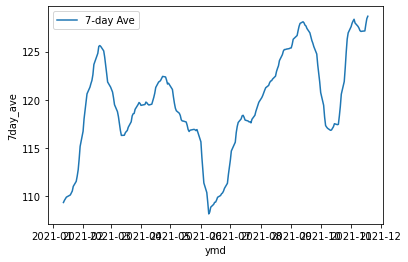

In [308]:
sns.lineplot(x="ymd",y="7day_ave",
             label="7-day Ave",
             data=ABT,
             ci=None)

#### back to real code

#### monthly average

In [132]:
range(len(data1))

range(0, 51)

new_data = []
for index in range(len(data1)):
    print(index)
    sub_data=data1[index]
    sub_data.drop(sub_data.columns[[5,10,11,12]], axis=1, inplace=True) 
    sub_data[[1,2,3,4,6,7,8,9]] = sub_data[[1,2,3,4,6,7,8,9]].apply(pd.to_numeric)
    sub_data['mean'] = sub_data.iloc[:, 1:8].mean(axis=1)
    sub_data = sub_data[[0, "Symbol", "mean"]]
    print(sub_data.head())
    new_data.append(sub_data)
new_data[:3]

In [222]:
new_data = []
for index in range(len(data1)):
    print(index)
    sub_data=data1[index]
    sub_data.drop(sub_data.columns[[5,10,11,12]], axis=1, inplace=True) 
    sub_data[[1,2,3,4,6,7,8,9]] = sub_data[[1,2,3,4,6,7,8,9]].apply(pd.to_numeric)
    sub_data[0]= pd.to_datetime(sub_data[0])
    sub_data['mean_price_everyday'] = sub_data.iloc[:, 1:9].mean(axis=1)
    sub_data_month = sub_data.groupby(pd.PeriodIndex(sub_data[0], freq="M"))['mean_price_everyday'].mean().reset_index()
    sub_data_month.rename(columns={0: 'year-month', 'mean_price_everyday': 'mean_price_month' }, inplace=True)
    sub_data_month["Symbol"] = sub_data["Symbol"].values[:11]
    print(sub_data_month.head())
    new_data.append(sub_data_month)
new_data[:3]

0
  year-month  mean_price_month Symbol
0    2021-01        168.634545    MMM
1    2021-02        175.314258    MMM
2    2021-03        184.209234    MMM
3    2021-04        194.874722    MMM
4    2021-05        200.248844    MMM
1
  year-month  mean_price_month Symbol
0    2021-01        111.822508    ABT
1    2021-02        122.911080    ABT
2    2021-03        118.324152    ABT
3    2021-04        121.033387    ABT
4    2021-05        117.348286    ABT
2
  year-month  mean_price_month Symbol
0    2021-01        106.306940   ABBV
1    2021-02        104.102500   ABBV
2    2021-03        104.588965   ABBV
3    2021-04        107.164648   ABBV
4    2021-05        114.180284   ABBV
3
  year-month  mean_price_month Symbol
0    2021-01        332.991220   ABMD
1    2021-02        326.382542   ABMD
2    2021-03        303.973171   ABMD
3    2021-04        332.870689   ABMD
4    2021-05        283.938579   ABMD
4
  year-month  mean_price_month Symbol
0    2021-01        254.848560    ACN
1 

[   year-month  mean_price_month Symbol
 0     2021-01        168.634545    MMM
 1     2021-02        175.314258    MMM
 2     2021-03        184.209234    MMM
 3     2021-04        194.874722    MMM
 4     2021-05        200.248844    MMM
 5     2021-06        197.669134    MMM
 6     2021-07        197.960193    MMM
 7     2021-08        196.316500    MMM
 8     2021-09        183.647625    MMM
 9     2021-10        178.505038    MMM
 10    2021-11        181.110754    MMM,
    year-month  mean_price_month Symbol
 0     2021-01        111.822508    ABT
 1     2021-02        122.911080    ABT
 2     2021-03        118.324152    ABT
 3     2021-04        121.033387    ABT
 4     2021-05        117.348286    ABT
 5     2021-06        110.343642    ABT
 6     2021-07        118.480187    ABT
 7     2021-08        123.655380    ABT
 8     2021-09        125.434586    ABT
 9     2021-10        120.686462    ABT
 10    2021-11        128.051696    ABT,
    year-month  mean_price_month Symbo

In [223]:
all_data = pd.concat(new_data, axis= 0)
all_data

year-month  mean_price_month Symbol
0     2021-01        168.634545    MMM
1     2021-02        175.314258    MMM
2     2021-03        184.209234    MMM
3     2021-04        194.874722    MMM
4     2021-05        200.248844    MMM
..        ...               ...    ...
6     2021-07        155.304703    AIZ
7     2021-08        163.733684    AIZ
8     2021-09        164.608095    AIZ
9     2021-10        162.282851    AIZ
10    2021-11        161.438641    AIZ

[561 rows x 3 columns]

In [227]:
all_data.reset_index(inplace=True)

In [229]:
all_data

index year-month  mean_price_month Symbol
0        0    2021-01        168.634545    MMM
1        1    2021-02        175.314258    MMM
2        2    2021-03        184.209234    MMM
3        3    2021-04        194.874722    MMM
4        4    2021-05        200.248844    MMM
..     ...        ...               ...    ...
556      6    2021-07        155.304703    AIZ
557      7    2021-08        163.733684    AIZ
558      8    2021-09        164.608095    AIZ
559      9    2021-10        162.282851    AIZ
560     10    2021-11        161.438641    AIZ

[561 rows x 4 columns]

In [231]:
all_data.dtypes

index                   int64
year-month          period[M]
mean_price_month      float64
Symbol                 object
dtype: object

In [234]:
all_data['year-month'] = all_data['year-month'].astype(str)

In [235]:
all_data.dtypes

index                 int64
year-month           object
mean_price_month    float64
Symbol               object
dtype: object

In [238]:
all_data['month'] = pd.DatetimeIndex(all_data['year-month']).month

In [239]:
all_data

index year-month  mean_price_month Symbol  month
0        0    2021-01        168.634545    MMM      1
1        1    2021-02        175.314258    MMM      2
2        2    2021-03        184.209234    MMM      3
3        3    2021-04        194.874722    MMM      4
4        4    2021-05        200.248844    MMM      5
..     ...        ...               ...    ...    ...
556      6    2021-07        155.304703    AIZ      7
557      7    2021-08        163.733684    AIZ      8
558      8    2021-09        164.608095    AIZ      9
559      9    2021-10        162.282851    AIZ     10
560     10    2021-11        161.438641    AIZ     11

[561 rows x 5 columns]

In [242]:
all_data.dtypes

index                 int64
year-month           object
mean_price_month    float64
Symbol               object
month                 int64
dtype: object

In [244]:
import calendar
all_data['month'] = all_data['month'].apply(lambda x: calendar.month_abbr[x])

In [245]:
all_data

index year-month  mean_price_month Symbol month
0        0    2021-01        168.634545    MMM   Jan
1        1    2021-02        175.314258    MMM   Feb
2        2    2021-03        184.209234    MMM   Mar
3        3    2021-04        194.874722    MMM   Apr
4        4    2021-05        200.248844    MMM   May
..     ...        ...               ...    ...   ...
556      6    2021-07        155.304703    AIZ   Jul
557      7    2021-08        163.733684    AIZ   Aug
558      8    2021-09        164.608095    AIZ   Sep
559      9    2021-10        162.282851    AIZ   Oct
560     10    2021-11        161.438641    AIZ   Nov

[561 rows x 5 columns]

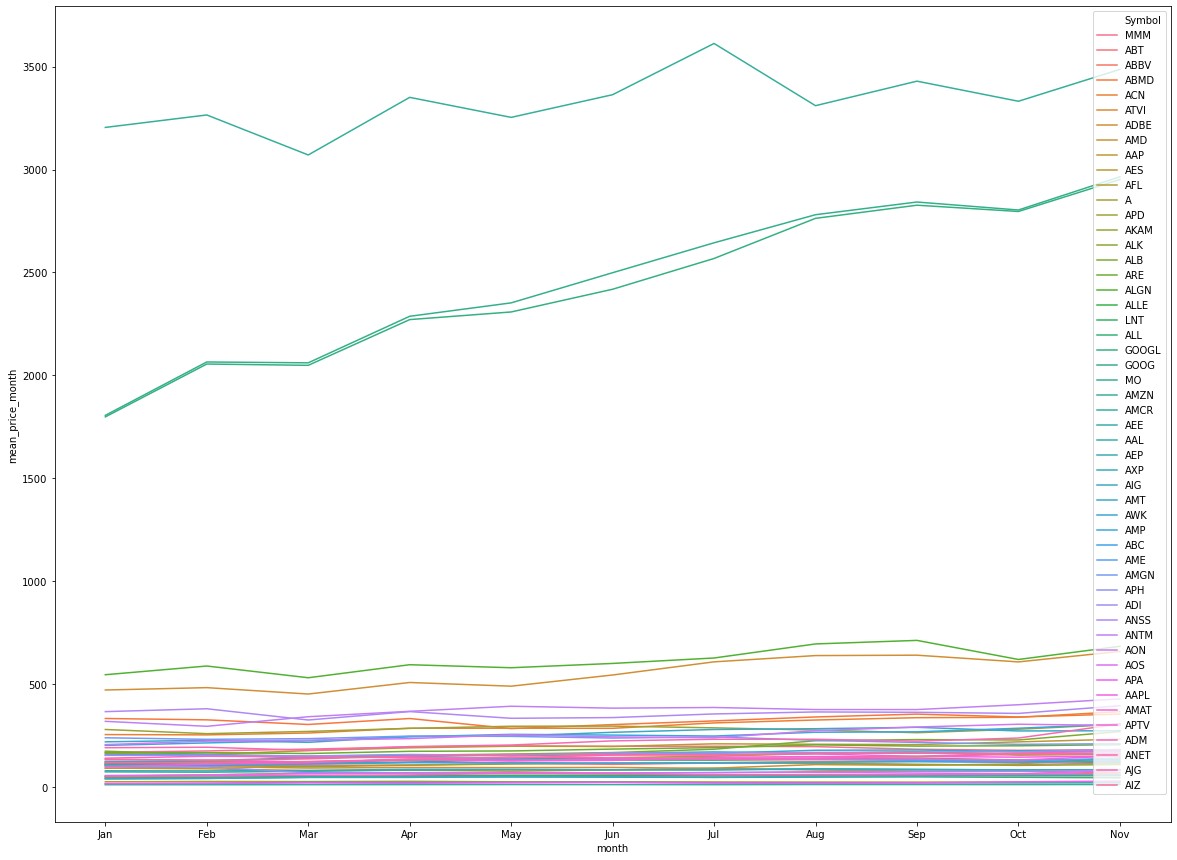

In [263]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

plt.figure(figsize = (20,15))

sns.lineplot(data=all_data, x='month', y='mean_price_month', hue='Symbol', sort=False)

#### 7-day rolling average

In [316]:
data2=[]

for symbol in ticker_symbols[:51]:
    url = "https://api.tiingo.com/tiingo/daily/{}/prices?startDate=2021-01-01&endDate={}&format=csv&token={}".format(symbol,end_date,token1)
    r = requests.get(url,timeout=10)
    #print(r)
    rows=r.text.split("\n")[1:-1]
    #print(rows)
    df=pd.DataFrame(rows)
    #print("raw df:",df.head())
    df=df.iloc[:,0].str.split(",",13,expand=True)
    #print("clean df", df.head())
    df["Symbol"]=symbol
    #print("symbol df", df.head())
    data2.append(df)
data2[:1]

[              0       1       2         3       4        5                 6  \
 0    2021-01-04  171.87   176.2  170.5504   175.0  2996278  166.545800945774   
 1    2021-01-05  171.58  173.25    170.65  172.01  2295297  166.264784582975   
 2    2021-01-06  174.19  175.57    172.04  172.72  3346410  168.793931848166   
 3    2021-01-07  169.72  173.46    166.16  171.56  5863373  164.462403773298   
 4    2021-01-08  166.62  169.54    164.61  169.17  4808130   161.45843575717   
 ..          ...     ...     ...       ...     ...      ...               ...   
 218  2021-11-12  183.66   186.3   180.285  180.95  4395646   182.15200110957   
 219  2021-11-15  183.31  185.04     182.9  184.09  1463522  181.804874895978   
 220  2021-11-16  183.37   184.2     182.7  183.31  1974979  181.864382246879   
 221  2021-11-17  183.34  183.87    181.63  183.37  2251139  181.834628571429   
 222  2021-11-18  178.77  182.54    178.69  182.11  2522091            178.77   
 
                     7    

In [317]:
new_data2 = []
for index in range(len(data2)):
    print(index)
    sub_data=data2[index]
    sub_data.drop(sub_data.columns[[5,10,11,12]], axis=1, inplace=True) 
    sub_data[[1,2,3,4,6,7,8,9]] = sub_data[[1,2,3,4,6,7,8,9]].apply(pd.to_numeric)
    sub_data[0]= pd.to_datetime(sub_data[0])
    sub_data['mean_price_everyday'] = sub_data.iloc[:, 1:9].mean(axis=1)
    sub_data['7day_ave'] = sub_data['mean_price_everyday'].rolling(7).mean()
    sub_data.rename(columns={0: 'ymd'}, inplace=True)
    sub_data = sub_data[['ymd', '7day_ave', 'Symbol']]
    print(sub_data.head())
    new_data2.append(sub_data)
new_data2[:1]

0
         ymd  7day_ave Symbol
0 2021-01-04       NaN    MMM
1 2021-01-05       NaN    MMM
2 2021-01-06       NaN    MMM
3 2021-01-07       NaN    MMM
4 2021-01-08       NaN    MMM
1
         ymd  7day_ave Symbol
0 2021-01-04       NaN    ABT
1 2021-01-05       NaN    ABT
2 2021-01-06       NaN    ABT
3 2021-01-07       NaN    ABT
4 2021-01-08       NaN    ABT
2
         ymd  7day_ave Symbol
0 2021-01-04       NaN   ABBV
1 2021-01-05       NaN   ABBV
2 2021-01-06       NaN   ABBV
3 2021-01-07       NaN   ABBV
4 2021-01-08       NaN   ABBV
3
         ymd  7day_ave Symbol
0 2021-01-04       NaN   ABMD
1 2021-01-05       NaN   ABMD
2 2021-01-06       NaN   ABMD
3 2021-01-07       NaN   ABMD
4 2021-01-08       NaN   ABMD
4
         ymd  7day_ave Symbol
0 2021-01-04       NaN    ACN
1 2021-01-05       NaN    ACN
2 2021-01-06       NaN    ACN
3 2021-01-07       NaN    ACN
4 2021-01-08       NaN    ACN
5
         ymd  7day_ave Symbol
0 2021-01-04       NaN   ATVI
1 2021-01-05       NaN   ATV

[           ymd    7day_ave Symbol
 0   2021-01-04         NaN    MMM
 1   2021-01-05         NaN    MMM
 2   2021-01-06         NaN    MMM
 3   2021-01-07         NaN    MMM
 4   2021-01-08         NaN    MMM
 ..         ...         ...    ...
 218 2021-11-12  181.115702    MMM
 219 2021-11-15  181.437945    MMM
 220 2021-11-16  181.611871    MMM
 221 2021-11-17  181.765168    MMM
 222 2021-11-18  181.742646    MMM
 
 [223 rows x 3 columns]]

In [318]:
all_data2 = pd.concat(new_data2, axis= 0)
all_data2

ymd    7day_ave Symbol
0   2021-01-04         NaN    MMM
1   2021-01-05         NaN    MMM
2   2021-01-06         NaN    MMM
3   2021-01-07         NaN    MMM
4   2021-01-08         NaN    MMM
..         ...         ...    ...
218 2021-11-12  161.496782    AIZ
219 2021-11-15  160.966429    AIZ
220 2021-11-16  160.495714    AIZ
221 2021-11-17  160.239786    AIZ
222 2021-11-18  160.303714    AIZ

[11373 rows x 3 columns]

all_data2 = all_data2.sort_values(by='7day_ave', ascending=False)
all_data2

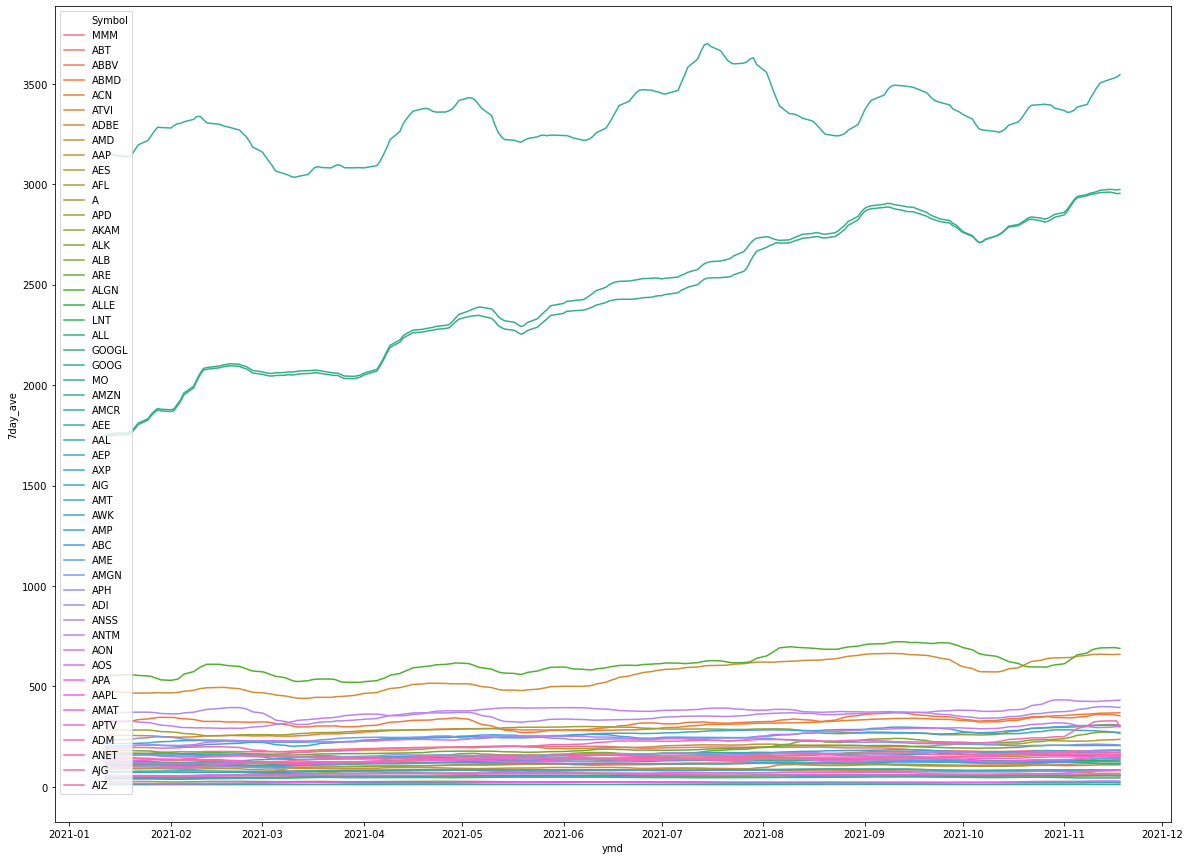

In [319]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

plt.figure(figsize = (20,15))

sns.lineplot(data=all_data2, x='ymd', y='7day_ave', hue='Symbol', sort=False)

### 5. Save dataset into csv file

In [44]:
df_final=pd.concat(data1)
df_final.drop(df_final.iloc[:,6:13],axis=1,inplace=True)
df_final.to_csv(r"/Users/anniephan/Desktop/Data_Science_Master/DATA_1050/Fall_2021/Homework_11/historicalSP_quotes.csv",index=False)

In [45]:
df_final.head()

0       1       2       3       4        5 Symbol
0  2019-01-03  183.76  188.28  182.89  188.28  3358241    MMM
1  2019-01-04  191.32  191.98  186.03  186.75  2995052    MMM
2  2019-01-07  190.88   192.3  188.66  191.36  2162158    MMM
3  2019-01-08  191.68  194.11  189.58   193.0  2479787    MMM
4  2019-01-09   192.3  193.94  191.38  193.25  2163815    MMM

In [46]:
df_final

0       1       2        3       4        5 Symbol
0    2019-01-03  183.76  188.28   182.89  188.28  3358241    MMM
1    2019-01-04  191.32  191.98   186.03  186.75  2995052    MMM
2    2019-01-07  190.88   192.3   188.66  191.36  2162158    MMM
3    2019-01-08  191.68  194.11   189.58   193.0  2479787    MMM
4    2019-01-09   192.3  193.94   191.38  193.25  2163815    MMM
..          ...     ...     ...      ...     ...      ...    ...
722  2021-11-12  160.22   160.8   158.35  160.42   325459    AIZ
723  2021-11-15  160.11  161.48   159.57  160.96   394338    AIZ
724  2021-11-16  160.56  161.84   159.99  160.26   303662    AIZ
725  2021-11-17  161.03  161.52  158.924  160.56   232632    AIZ
726  2021-11-18  160.24  161.79   159.48  161.23   350963    AIZ

[36968 rows x 7 columns]

## Visualizations

## Step 3: Automating and Scheduling Python scripts on Google Cloud Compute Engine

## Step 4: Storing output tables into GoogleCloudStorage

In [ ]:
import os
from google.cloud.storage.blob import Blob
os.environ['GOOGLE_APPLICATION_CREDENTIALS']=r"/home/annie_ptba/My First Project-506764075115.json"
storage_client = storage.Client()
bucket = storage_client.get_bucket("draft_gcp_1")
data=bucket.blob("SP500stocks.csv")
data.upload_from_filename(r"/home/annie_ptba/SP500stocks.csv")

## Step 5: Use CloudFunctions to automate file transfer from CloudStorage into GoogleBigQuery

In [ ]:
def csvloader(data,context):
    from google.cloud import bigquery
    client = bigquery.Client()
    table_ref = client.dataset("csm").table("SPhistorical")
    job_config = bigquery.LoadJobConfig()
    job_config.write_disposition =     bigquery.WriteDisposition.WRITE_TRUNCATE
    job_config.skip_leading_rows = 1
    
    job_config.source_format = bigquery.SourceFormat.CSV
    uri = "gs://csm_erat/Data/historicalSP_quotes.csv"
    load_job = client.load_table_from_uri(uri, table_ref, job_config=job_config)
load_job.result()
    destination_table = client.get_table(table_ref)